 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P TSX 60 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
import pathlib
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp_tsx_history.csv`: Contains historical closing prices of the S&P TSX 60 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data.

In [2]:
## function to read the data from csv file and create / return a dataframe 
def get_data_frame_from_csv(csv_file):
    csv_file_path = pathlib.Path(csv_file)
    data = pd.read_csv(csv_file_path)
    data = clean_data(data)
    data = data.set_index(pd.to_datetime(data["Date"], infer_datetime_format='%Y-%m-%d'))
    data.head()
    return data

## function to read the data from Google Finance 
def get_data_frame_from_csv_source_google_finance(csv_file):
    df = pd.read_csv(csv_file) 
    df['Date'] = fix_data_types(df['Date'],'date')
    df['Date'] = pd.to_datetime(df['Date'] ,format = '%Y-%m-%d')
    df['Date'] = df['Date'].apply(lambda x : x.date())
    ## original format is in dateTime and convert to Date similar to the rest of the data 
    df = df.set_index(pd.to_datetime(df["Date"], infer_datetime_format='%Y-%m-%d'))
    return df
    

## function to clean the data
def clean_data(data):
    ## count null data
    data.isnull().count()
    ## drop nulls
    data = data.dropna()
    return data

## function to fix Data Types
def fix_data_types(df_slice,to_data_type):
    if (to_data_type=='date'):
        df_slice = pd.to_datetime(df_slice)
        ## df['Date'] = df['Date'].astype('datetime64[ns]')
    elif (to_data_type=='numeric'):
        ## remove the '$',',' symbol in price data 
        df_slice = df_slice.replace({'\$':'','\,':''}, regex = True)
        df_slice = pd.to_numeric(df_slice, downcast="float")
    else:
        return df_slice
    return df_slice

## function to calculate Cumulative Returns from Daily Returns and Plot
def calculate_cumulative_returns(data):
    data_cumulative_returns = (1 + data).cumprod()
    data_cumulative_returns.head()
    # Plot cumulative returns
    data_cumulative_returns.plot()
    return data

In [3]:
# Reading whale returns
whale_data = get_data_frame_from_csv('./Resources/whale_returns.csv')
whale_data = whale_data.drop(columns=["Date"])
whale_data.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data.

In [4]:
# Reading algorithmic returns
algo_data = get_data_frame_from_csv('./Resources/algo_returns.csv')
algo_data = algo_data.drop(columns=["Date"])
algo_data.head()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


## S&P TSX 60 Returns

Read the S&P TSX 60 historic closing prices and create a new daily returns DataFrame from the data. 

In [5]:
# Reading S&P TSX 60 Closing Prices
spTsx_data = get_data_frame_from_csv('./Resources/sp_tsx_history.csv')

In [6]:
# Check Data Types
spTsx_data.dtypes

Date     object
Close    object
dtype: object

In [7]:
# Fix Data Types
spTsx_data.head()
spTsx_data['Date'] = fix_data_types(spTsx_data['Date'],'date')
## convert closing price data type object to numeric 
spTsx_data['Close'] = fix_data_types(spTsx_data['Close'],'numeric')
spTsx_data = spTsx_data.rename(columns = {'Date': 'Date', 'Close': 'SPTSX'}, inplace = False)
spTsx_data = spTsx_data.drop(columns=["Date"])

In [8]:
# Calculate Daily Returns
spTsx_data.head()
spTsx_data_daily_returns = spTsx_data.pct_change()

In [9]:
# Drop nulls
spTsx_data_daily_returns.isnull().count()
spTsx_data_daily_returns = spTsx_data_daily_returns.dropna();

In [10]:
# Rename `Close` Column to be specific to this portfolio.
spTsx_data_daily_returns = spTsx_data_daily_returns.rename(columns = {'Date': 'Date', 'Close': 'SPTSX'}, inplace = False)
spTsx_data_daily_returns.head()

,SPTSX
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709


## Combine Whale, Algorithmic, and S&P TSX 60 Returns

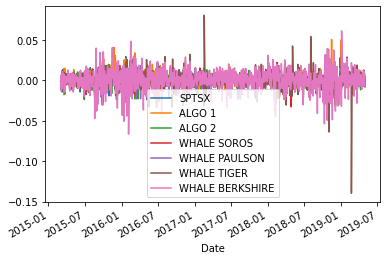

In [11]:
# Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns.
frames = [spTsx_data_daily_returns, algo_data, whale_data]

all_data = pd.concat(frames,axis="columns", join="inner")
all_data = clean_data(all_data)
all_data.dtypes

# Rename the columns 
old_names = all_data.columns.tolist()                                                                                                                                                                   
new_names = ["SPTSX", "ALGO 1", "ALGO 2", "WHALE SOROS", "WHALE PAULSON", "WHALE TIGER", "WHALE BERKSHIRE"]                                                                                                                                                                             
all_data = all_data.rename(columns=dict(zip(old_names, new_names))) 
#all_data.head(100)
all_data.plot()
plt.savefig("Output-Screenshots/combine-Whale-Algo-SpTsx.png")

---

# Conduct Quantitative Analysis
In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Analysis

#### Calculate and Plot the daily returns.

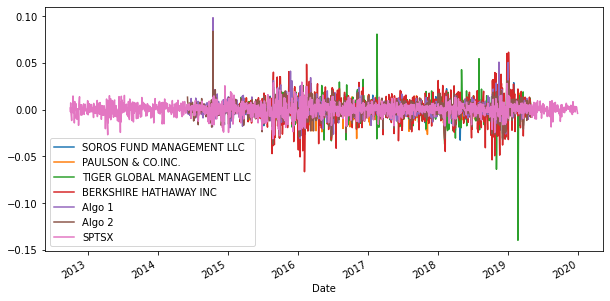

In [12]:
# Plot daily returns of all portfolios
ax = whale_data.plot(figsize=(10,5))
ax = algo_data.plot(ax=ax, figsize=(10,5))
ax = spTsx_data_daily_returns.plot(ax=ax, figsize=(10,5))
plt.savefig("Output-Screenshots/plot-daily-returns.png")

#### Calculate and Plot cumulative returns.

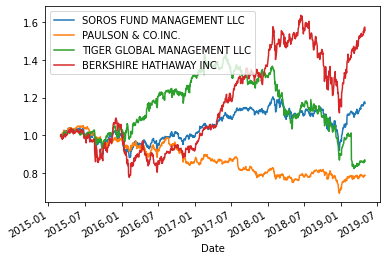

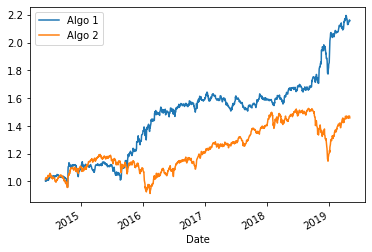

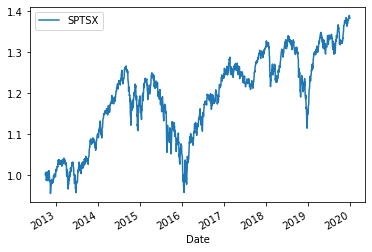

In [13]:
# Calculate cumulative returns of all portfolios
whale_data_cumulative_returns = calculate_cumulative_returns(whale_data)
algo_data_cumulative_returns = calculate_cumulative_returns(algo_data)
spTsx_data_cumulative_returns = calculate_cumulative_returns(spTsx_data_daily_returns)

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios.
4. Determine which portfolios are riskier than the S&P TSX 60.
5. Calculate the Annualized Standard Deviation.

### Create a box plot for each portfolio


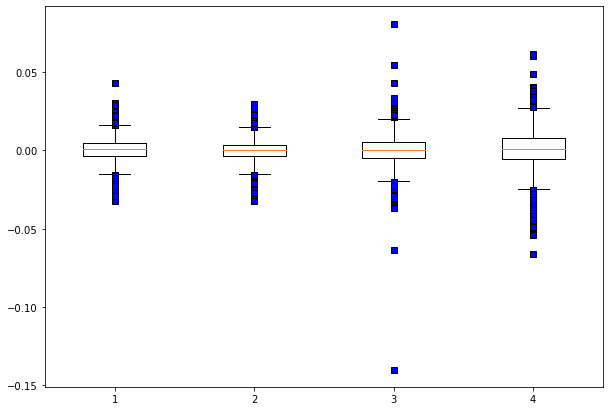

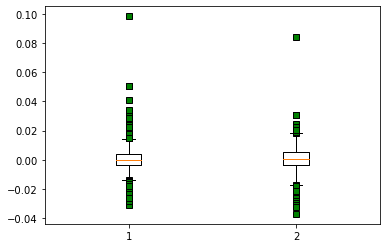

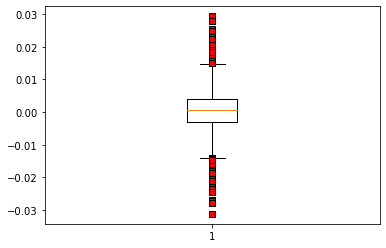

<Figure size 432x288 with 0 Axes>

In [14]:
# Box plot to visually show risk
fig = plt.figure(figsize =(10, 7))
blue_square = dict(markerfacecolor='b', marker='s')
plt.boxplot(whale_data,vert=True,flierprops=blue_square)
plt.show()
plt.savefig("Output-Screenshots/box-plot-portfolio-whale.png")

green_square = dict(markerfacecolor='g', marker='s')
plt.boxplot(algo_data,vert=True,flierprops=green_square)
plt.show()
plt.savefig("Output-Screenshots/box-plot-portfolio-algo.png")

red_square = dict(markerfacecolor='r', marker='s')
plt.boxplot(spTsx_data_daily_returns,vert=True,flierprops=red_square)
plt.show()
plt.savefig("Output-Screenshots/box-plot-portfolio-spTsx.png")

### Calculate Standard Deviations

In [15]:
# Calculate the daily standard deviations of all portfolios
all_data_std = all_data.std()
all_data_std.sort_values(ascending=True)
all_data_std

SPTSX              0.007034
ALGO 1             0.007589
ALGO 2             0.008326
WHALE SOROS        0.007828
WHALE PAULSON      0.006982
WHALE TIGER        0.010883
WHALE BERKSHIRE    0.012826
dtype: float64

### Determine which portfolios are riskier than the S&P TSX 60

In [16]:
# Calculate  the daily standard deviation of S&P TSX 60
spTsx_data_std = spTsx_data_daily_returns.std()
print (spTsx_data_std)
print ()
whale_data_std = whale_data.std()
print (whale_data_std)
print ()
algo_data_std = algo_data.std()
print (algo_data_std)

SPTSX    0.006637
dtype: float32

SOROS FUND MANAGEMENT LLC      0.007842
PAULSON & CO.INC.              0.006977
TIGER GLOBAL MANAGEMENT LLC    0.010824
BERKSHIRE HATHAWAY INC         0.012831
dtype: float64

Algo 1    0.007988
Algo 2    0.008466
dtype: float64


# Determine which portfolios are riskier than the S&P TSX 60
Portfolios that are riskier than the S&P TSX 60 are SOROS FUND MANAGEMENT LLC, PAULSON & CO.INC., TIGER GLOBAL MANAGEMENT LLC, BERKSHIRE HATHAWAY INC, Algo 1 and Algo 2.

### Calculate the Annualized Standard Deviation

In [17]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std = all_data_std * np.sqrt(252)
annualized_std.head()

SPTSX            0.111664
ALGO 1           0.120470
ALGO 2           0.132177
WHALE SOROS      0.124259
WHALE PAULSON    0.110841
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window.
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P TSX 60.
3. Choose one portfolio, then calculate and plot the 60-day rolling beta for it and the S&P TSX 60.

### Calculate and plot rolling `std` for all portfolios with 21-day window

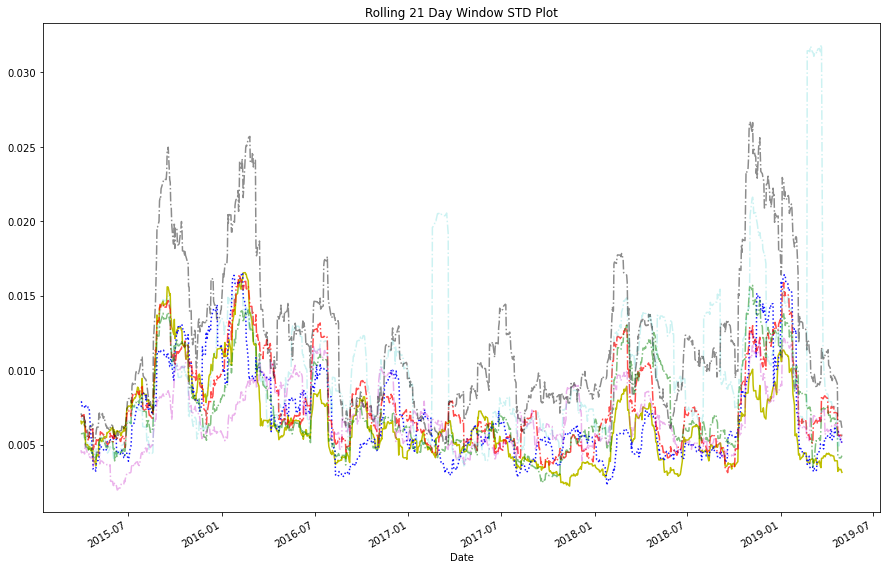

In [18]:
# 1. Calculate the rolling standard deviation for all portfolios using a 21-day window
window = 21

roll_std_SPTSX = all_data['SPTSX'].rolling(window).std()
roll_std_algo1 = all_data['ALGO 1'].rolling(window).std()
roll_std_algo2 = all_data['ALGO 2'].rolling(window).std()
roll_std_whale_soros = all_data['WHALE SOROS'].rolling(window).std()
roll_std_whale_paulson = all_data['WHALE PAULSON'].rolling(window).std()
roll_std_tiger = all_data['WHALE TIGER'].rolling(window).std()
roll_std_berkshire = all_data['WHALE BERKSHIRE'].rolling(window).std()
roll_std_berkshire

## Plot
plot1 = roll_std_SPTSX.plot(figsize=(15,10), title='Rolling 21 Day Window STD Plot', color='y')
roll_std_algo1.plot(ax=plot1, color='b', linestyle='dotted', alpha=0.9)
roll_std_algo2.plot(ax=plot1, color='r', linestyle='dashdot', alpha=0.7)
roll_std_whale_soros.plot(ax=plot1, color='g', linestyle='dashdot', alpha=0.5)
roll_std_whale_paulson.plot(ax=plot1, color='m', linestyle='dashdot', alpha=0.3)
roll_std_tiger.plot(ax=plot1, color='c', linestyle='dashdot', alpha=0.2)
roll_std_berkshire.plot(ax=plot1, color='k', linestyle='dashdot', alpha=0.45)

plt.savefig("Output-Screenshots/rolling-std-plot-21-day-window.png")

### Calculate and plot the correlation

<AxesSubplot:>

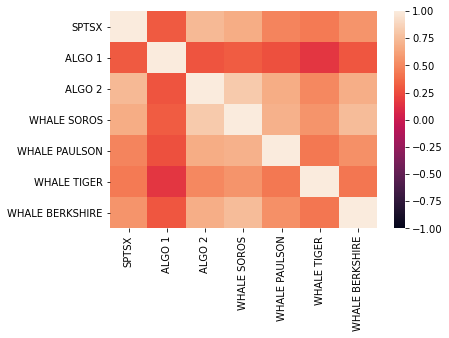

In [19]:
# Calculate the correlation
correlation = all_data.corr()
correlation

# Display de correlation matrix
sns.heatmap(correlation, vmin=-1, vmax=1)

### Calculate and Plot Beta for a chosen portfolio and the S&P 60 TSX

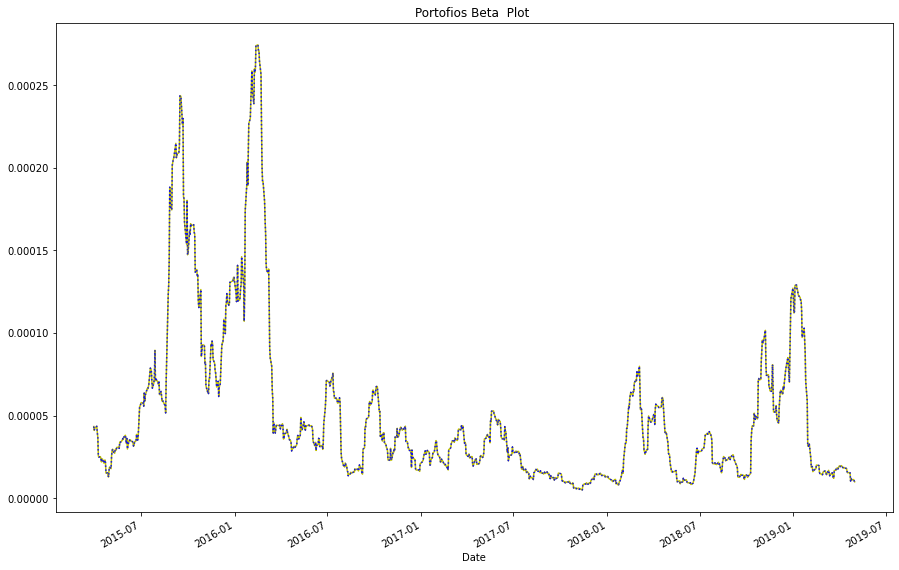

In [20]:
# Calculate covariance of a single portfolio - Whale
covariance_spTsx_whale = all_data['WHALE TIGER'].cov(all_data['SPTSX'])
covariance_spTsx_whale

# Calculate variance of S&P TSX
spTsx_data_variance = all_data['SPTSX'].rolling(window=21).var()
spTsx_data_variance

whale_data_variance = all_data['SPTSX'].rolling(window=21).var()
whale_data_variance

# Computing beta
beta = covariance_spTsx_whale / spTsx_data_variance

plot = spTsx_data_variance.plot(figsize=(15,10), title='Portofios Beta  Plot ', color='y')
whale_data_variance.plot(ax=plot, color='b', linestyle='dotted', alpha=0.9)
plt.savefig("Output-Screenshots/rbeta-whale-sptsx.png")

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

In [21]:
# Use `ewm` to calculate the rolling window
all_data.ewm(halflife='21 days',times=pd.DatetimeIndex(all_data.index)).mean()

,SPTSX,ALGO 1,ALGO 2,WHALE SOROS,WHALE PAULSON,WHALE TIGER,WHALE BERKSHIRE
Date,,,,,,,
2015-03-03,-0.008530,-0.001942,-0.000949,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,-0.005908,-0.005320,0.000761,0.000511,-0.000802,-0.001532,-0.001089
2015-03-05,-0.003410,-0.003817,0.001988,0.001718,0.000878,-0.000193,0.001603
2015-03-06,-0.005133,-0.004116,-0.001542,-0.000808,-0.000291,-0.002369,-0.002256
2015-03-09,-0.005452,-0.004415,-0.000903,-0.000496,0.000724,-0.000524,-0.002121
...,...,...,...,...,...,...,...
2019-04-25,0.001036,0.000432,0.000835,0.001442,-0.000019,-0.000738,0.001975
2019-04-26,0.001092,0.000549,0.001039,0.001751,0.000404,-0.000134,0.002365
2019-04-29,0.001001,0.000775,0.001126,0.001727,0.000516,0.000175,0.002504


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [22]:
# Annualized Sharpe Ratios
sharpe_ratios = ((all_data.mean()) * 252) / (all_data.std() * np.sqrt(252))
sharpe_ratios.dtypes

dtype('float64')

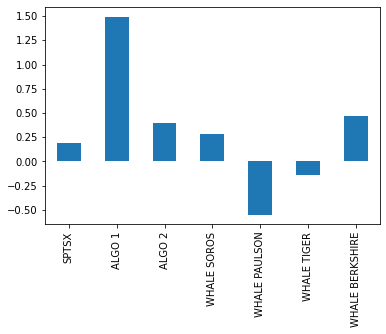

In [23]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind='bar')
plt.savefig("Output-Screenshots/bar-sharpe-ratios-spTsx_Whale_Algo.png")

### Determine whether the algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios.

Yes, the algorithmic strategies have outperformed the market and most of the symbol in the whales portfolios. 

From the analysis of data and the charts retrieved as output from the above algorithms applied, it could be determined that ALGO 1 has been performing better and the whales portfolio on the drop side however Berkshire was performing somewhat better on those whale portfolio. 

The highest being the ALGO 1 and the second highest being the Whale Berkshire clearly shows the strategies outperformed the market S&P TSX 60 in general.


---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P TSX 60. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock.
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns.
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others.
5. Include correlation analysis to determine which stocks (if any) are correlated.

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P TSX 60 index.

* `SHOP` - [Shopify Inc](https://en.wikipedia.org/wiki/Shopify)

* `OTEX` - [Open Text Corporation](https://en.wikipedia.org/wiki/OpenText)

* `L` - [Loblaw Companies Limited](https://en.wikipedia.org/wiki/Loblaw_Companies)

In [24]:
## Custom Portfolio chosen is 'AAPL', 'FB', 'GOOG' from Google Finance Data and 'SHOP', 'OTEX' from data provided 

# Reading data from 1st stock
shop_data = get_data_frame_from_csv('./Resources/shop_historical.csv')
shop_data = shop_data.drop(columns=["Date","Symbol"])
shop_data.head()

,Close
Date,
2018-01-02,132.06
2018-01-03,135.15
2018-01-04,137.46
2018-01-05,137.26
2018-01-08,139.51


In [25]:
# Reading data from 2nd stock
otex_data = get_data_frame_from_csv('./Resources/otex_historical.csv')
otex_data = otex_data.drop(columns=["Date", "Symbol"])
otex_data.head()

,Close
Date,
2018-01-02,43.58
2018-01-03,43.07
2018-01-04,42.91
2018-01-05,42.57
2018-01-08,42.16


## custom data from Google Finance for 'aapl', 'fb', 'goog'
The Google Finance function used to retrieve csv data => =GOOGLEFINANCE("NASDAQ:GOOG", "price", DATE(2018,1,1), DATE(2019,12,31), "DAILY") 

In [26]:
# Reading data for AAPL 
aapl_data = get_data_frame_from_csv_source_google_finance('./Resources/aapl_data.csv')
aapl_data = aapl_data.drop(columns=["Date"])
aapl_data.head()

,Close
Date,
2018-02-01,43.07
2018-03-01,43.06
2018-04-01,43.26
2018-05-01,43.75
2018-08-01,43.59


In [27]:
# Reading data from 1st custom stock
fb_data = get_data_frame_from_csv_source_google_finance('./Resources/fb_data.csv')
fb_data = fb_data.drop(columns=["Date"])
fb_data.head()

,Close
Date,
2018-02-01,181.42
2018-03-01,184.67
2018-04-01,184.33
2018-05-01,186.85
2018-08-01,188.28


In [28]:
# Reading data from 3rd stock
goog_data = get_data_frame_from_csv_source_google_finance('./Resources/goog_data.csv')
goog_data = goog_data.drop(columns=["Date"])
goog_data.head()

,Close
Date,
2018-02-01,1065.00
2018-03-01,1082.48
2018-04-01,1086.40
2018-05-01,1102.23
2018-08-01,1106.94


In [29]:
# Combine all stocks in a single DataFrame
shop_data = shop_data.rename(columns = {'Close': 'Shop'}, inplace = False)
shop_data = clean_data(shop_data)
shop_data.head()

otex_data = otex_data.rename(columns = {'Close': 'Otex'}, inplace = False)
otex_data = clean_data(otex_data)
goog_data.head()

# rename column Close to Aapl for concat to all_data 
aapl_data = aapl_data.rename(columns = {'Close': 'Aapl'}, inplace = False)
aapl_data = clean_data(aapl_data)
aapl_data.head()

## rename column Close to Fb for concat to all_data 
fb_data = fb_data.rename(columns = {'Close': 'Fb'}, inplace = False)
fb_data = clean_data(fb_data)
fb_data.head()

# rename column Close to L for concat to all_data 
goog_data = goog_data.rename(columns = {'Close': 'Goog'}, inplace = False)
goog_data = clean_data(goog_data)
goog_data.head()

all_stocks_frames = [shop_data, otex_data, aapl_data, fb_data, goog_data] 
all_stocks_frames_data = pd.concat(all_stocks_frames,axis="columns")
all_stocks_frames_data = clean_data(all_stocks_frames_data)
#all_stocks_frames_data.dtypes

In [30]:
# Reset Date index
## data index is set in the function get_data_frame_from_csv
all_stocks_frames_data.head()

,Shop,Otex,Aapl,Fb,Goog
Date,,,,,
2018-01-02,132.06,43.58,41.95,193.09,1167.70
2018-01-03,135.15,43.07,43.75,175.94,1069.52
2018-01-05,137.26,42.57,42.28,173.86,1037.31
2018-01-08,139.51,42.16,50.38,171.65,1220.01
2018-01-10,139.29,41.99,56.82,162.44,1195.31


In [31]:
# Reorganize portfolio data by having a column per symbol
# done this before concat 

In [32]:
# Calculate daily returns
all_stocks_frames_data_daily_returns = all_stocks_frames_data.pct_change()
# Drop NAs
all_stocks_frames_data_daily_returns.isnull().count()
all_stocks_frames_data_daily_returns = all_stocks_frames_data_daily_returns.dropna()
# Display sample data
all_stocks_frames_data_daily_returns.head(100)

,Shop,Otex,Aapl,Fb,Goog
Date,,,,,
2018-01-03,0.023398,-0.011703,0.042908,-0.088819,-0.084080
2018-01-05,0.015612,-0.011609,-0.033600,-0.011822,-0.030116
2018-01-08,0.016392,-0.009631,0.191580,-0.012711,0.176129
2018-01-10,-0.001577,-0.004032,0.127829,-0.053656,-0.020246
2018-01-11,-0.001077,0.007145,-0.022175,-0.065809,-0.104835
...,...,...,...,...,...
2018-06-13,-0.002139,0.003189,0.091575,0.377999,0.061812
2018-06-14,0.026237,-0.001907,0.000419,0.022868,0.015272
2018-06-15,0.008083,0.004459,-0.010273,-0.004878,0.000122


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [33]:
# Set weights
weights = [1/5, 1/5, 1/5, 1/5, 1/5]

# Calculate portfolio return
shop_data_weighted_returns = ( weights[3] * shop_data.pct_change() )
otex_data_weighted_returns = ( weights[4] * otex_data.pct_change() )

aapl_data_weighted_returns = ( weights[0] * aapl_data.pct_change() )
fb_data_weighted_returns = ( weights[1] * fb_data.pct_change() )
goog_data_weighted_returns = ( weights[2] * goog_data.pct_change() )


# rename column to weighted -  prepare for concat
shop_data_weighted_returns = shop_data_weighted_returns.rename(columns = {'Shop': 'Shop Weighted'}, inplace = False)
otex_data_weighted_returns = otex_data_weighted_returns.rename(columns = {'Otex': 'Otex Weighted'}, inplace = False)

aapl_data_weighted_returns = aapl_data_weighted_returns.rename(columns = {'Aapl': 'Aapl Weighted'}, inplace = False)
fb_data_weighted_returns = fb_data_weighted_returns.rename(columns = {'Fb': 'Fb Weighted'}, inplace = False)
goog_data_weighted_returns = goog_data_weighted_returns.rename(columns = {'Goog': 'Goog Weighted'}, inplace = False)

# Display sample data
aapl_data_weighted_returns.head()

,Aapl Weighted
Date,
2018-02-01,NaN
2018-03-01,-0.000046
2018-04-01,0.000929
2018-05-01,0.002265
2018-08-01,-0.000731


## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [34]:
# Join your returns DataFrame to the original returns DataFrame
all_stocks_frames = [all_stocks_frames_data_daily_returns, whale_data, algo_data, spTsx_data_daily_returns] 
all_stocks_frames_data = pd.concat(all_stocks_frames,axis="columns", join="inner")
# Display sample data
all_stocks_frames_data.head(100)

,Shop,Otex,Aapl,Fb,Goog,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SPTSX
Date,,,,,,,,,,,,
2018-01-03,0.023398,-0.011703,0.042908,-0.088819,-0.084080,0.004658,0.000027,0.001979,0.005676,-0.000890,0.008175,0.003774
2018-01-05,0.015612,-0.011609,-0.033600,-0.011822,-0.030116,0.004072,0.000823,0.000737,0.022023,-0.003839,0.006405,-0.003869
2018-01-08,0.016392,-0.009631,0.191580,-0.012711,0.176129,0.004473,-0.003739,0.005085,0.003435,0.001653,0.000658,-0.001944
2018-01-10,-0.001577,-0.004032,0.127829,-0.053656,-0.020246,-0.002753,-0.002290,-0.005720,-0.004781,0.003567,-0.000224,-0.004368
2018-01-11,-0.001077,0.007145,-0.022175,-0.065809,-0.104835,0.010541,0.011773,-0.002063,0.017662,-0.005614,0.016898,0.002400
...,...,...,...,...,...,...,...,...,...,...,...,...
2018-06-13,-0.002139,0.003189,0.091575,0.377999,0.061812,-0.006118,-0.000856,-0.002115,-0.007563,0.003277,-0.004322,-0.001422
2018-06-14,0.026237,-0.001907,0.000419,0.022868,0.015272,0.004936,-0.000039,0.006399,0.018529,-0.003715,0.009454,0.003882
2018-06-15,0.008083,0.004459,-0.010273,-0.004878,0.000122,-0.001878,-0.000626,0.011291,-0.007021,-0.004125,-0.000029,-0.000890


In [35]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
all_stocks_frames_data.isnull().count()
all_stocks_frames_data = all_stocks_frames_data.dropna()

## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [36]:
# Calculate the annualized `std`
annualized_std = all_stocks_frames_data * np.sqrt(252)
annualized_std.head()

,Shop,Otex,Aapl,Fb,Goog,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SPTSX
Date,,,,,,,,,,,,
2018-01-03,0.371439,-0.185773,0.681147,-1.409953,-1.334726,0.073936,0.000430,0.031413,0.090108,-0.014132,0.129775,0.059917
2018-01-05,0.247837,-0.184287,-0.533383,-0.187672,-0.478082,0.064634,0.013069,0.011695,0.349600,-0.060946,0.101676,-0.061416
2018-01-08,0.260219,-0.152890,3.041237,-0.201787,2.795955,0.071000,-0.059350,0.080723,0.054528,0.026247,0.010442,-0.030867
2018-01-10,-0.025033,-0.064010,2.029215,-0.851758,-0.321391,-0.043699,-0.036357,-0.090803,-0.075891,0.056618,-0.003561,-0.069348
2018-01-11,-0.017095,0.113416,-0.352022,-1.044684,-1.664200,0.167326,0.186884,-0.032746,0.280372,-0.089125,0.268251,0.038094


### Calculate and plot rolling `std` with 21-day window

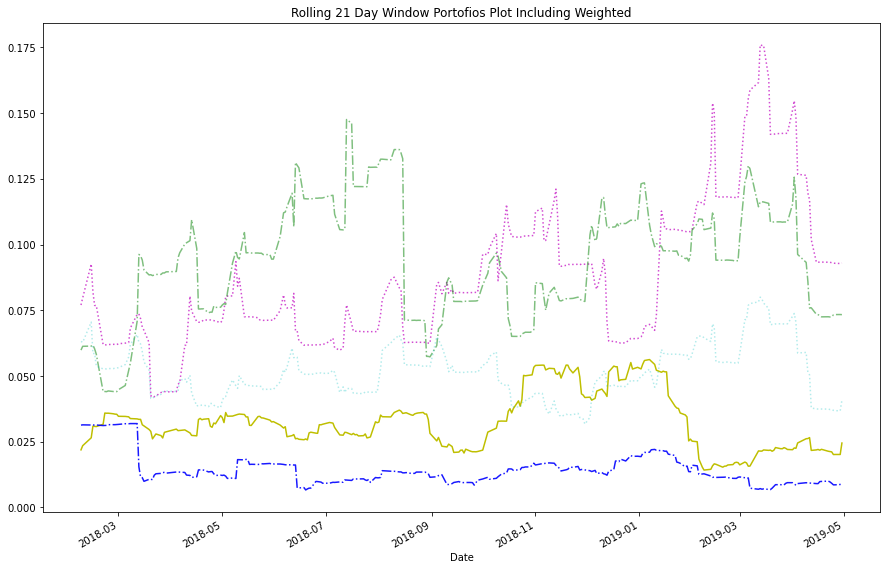

In [37]:
# Calculate rolling standard deviation
window = 21
roll_std_shop = all_stocks_frames_data['Shop'].rolling(window).std()
roll_std_otex = all_stocks_frames_data['Otex'].rolling(window).std()

roll_std_aapl = all_stocks_frames_data['Aapl'].rolling(window).std()
roll_std_fb = all_stocks_frames_data['Fb'].rolling(window).std()
roll_std_goog = all_stocks_frames_data['Goog'].rolling(window).std()


# Plot rolling standard deviation
plot2 = roll_std_shop.plot(figsize=(15,10), title='Rolling 21 Day Window Portofios Plot Including Weighted', color='y')
roll_std_otex.plot(ax=plot2, color='b', linestyle='dashdot', alpha=0.9)
roll_std_aapl.plot(ax=plot2, color='m', linestyle='dotted', alpha=0.7)
roll_std_fb.plot(ax=plot2, color='g', linestyle='dashdot', alpha=0.5)
roll_std_goog.plot(ax=plot2, color='c', linestyle='dotted', alpha=0.3)
plt.savefig("Output-Screenshots/rolling-Std-21-day-window.png")

### Calculate and plot the correlation

<AxesSubplot:>

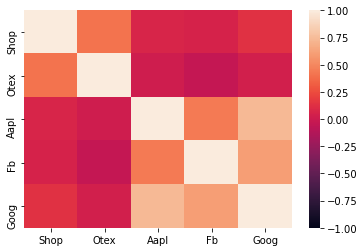

In [38]:
# Calculate and plot the correlation
correlation2 = all_stocks_frames_data_daily_returns.corr()
correlation2

# Display de correlation matrix
sns.heatmap(correlation2, vmin=-1, vmax=1)

### Calculate and Plot the 60-day Rolling Beta for Your Portfolio compared to the S&P 60 TSX

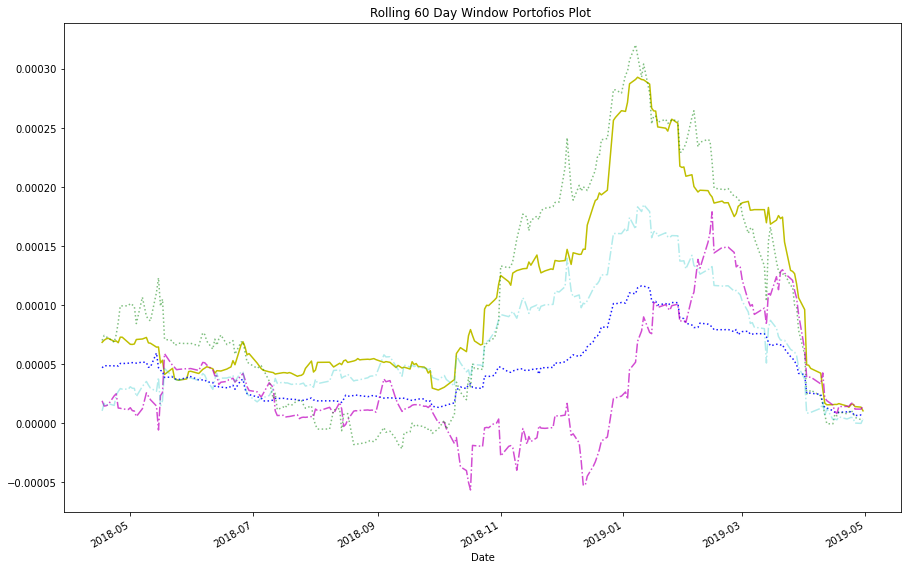

In [39]:
# Calculate and plot Beta
window = 60

#shop_data_daily_returns 
rolling_covariance_shop = all_stocks_frames_data['Shop'].rolling(window=60).cov(all_stocks_frames_data['SPTSX'])
rolling_covariance_shop

#otex_data_daily_returns 
rolling_covariance_otex = all_stocks_frames_data['Otex'].rolling(window=60).cov(all_stocks_frames_data['SPTSX'])
rolling_covariance_otex

#aapl_data_daily_returns 
rolling_covariance_aapl = all_stocks_frames_data['Aapl'].rolling(window=60).cov(all_stocks_frames_data['SPTSX'])
rolling_covariance_aapl

#fb_data_daily_returns 
rolling_covariance_fb = all_stocks_frames_data['Fb'].rolling(window=60).cov(all_stocks_frames_data['SPTSX'])
rolling_covariance_fb

#goog_data_daily_returns 
rolling_covariance_goog = all_stocks_frames_data['Goog'].rolling(window=60).cov(all_stocks_frames_data['SPTSX'])
rolling_covariance_goog

plot2 = rolling_covariance_shop.plot(figsize=(15,10), title='Rolling 60 Day Window Portofios Plot ', color='y')
rolling_covariance_otex.plot(ax=plot2, color='b', linestyle='dotted', alpha=0.9)
rolling_covariance_aapl.plot(ax=plot2, color='m', linestyle='dashdot', alpha=0.7)
rolling_covariance_fb.plot(ax=plot2, color='g', linestyle='dotted', alpha=0.5)
rolling_covariance_goog.plot(ax=plot2, color='c', linestyle='dashdot', alpha=0.3)

plt.savefig("Output-Screenshots/rolling-60-day-plot-portfolio.png")

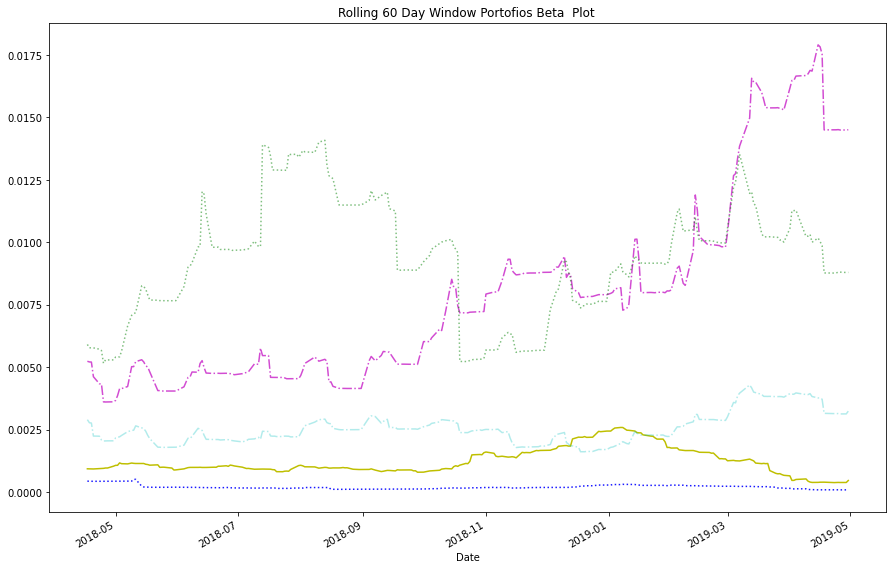

In [40]:
# Beta 
rolling_variance_spTsx = all_stocks_frames_data['SPTSX'].rolling(window=60).var()

rolling_variance_shop = all_stocks_frames_data['Shop'].rolling(window=60).var()
rolling_variance_otex = all_stocks_frames_data['Otex'].rolling(window=60).var()

rolling_variance_aapl = all_stocks_frames_data['Aapl'].rolling(window=60).var()
rolling_variance_fb = all_stocks_frames_data['Fb'].rolling(window=60).var()
rolling_variance_goog = all_stocks_frames_data['Goog'].rolling(window=60).var()

beta_shop = rolling_covariance_shop/rolling_variance_spTsx
beta_otex = rolling_covariance_otex/rolling_variance_spTsx

beta_aapl = rolling_covariance_aapl/rolling_variance_spTsx
beta_fb = rolling_covariance_fb/rolling_variance_spTsx
beta_goog = rolling_covariance_goog/rolling_variance_spTsx


plot3 = rolling_variance_shop.plot(figsize=(15,10), title='Rolling 60 Day Window Portofios Beta  Plot ', color='y')
rolling_variance_otex.plot(ax=plot3, color='b', linestyle='dotted', alpha=0.9)

rolling_variance_aapl.plot(ax=plot3, color='m', linestyle='dashdot', alpha=0.7)
rolling_variance_fb.plot(ax=plot3, color='g', linestyle='dotted', alpha=0.5)
rolling_variance_goog.plot(ax=plot3, color='c', linestyle='dashdot', alpha=0.3)

plt.savefig("Output-Screenshots/beta-plot-portfolio.png")

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [41]:
# Calculate Annualzied Sharpe Ratios
sharpe_ratios = ((all_stocks_frames_data_daily_returns.mean()) * 252) / (all_stocks_frames_data_daily_returns.std() * np.sqrt(252))
print (sharpe_ratios)

Shop    1.756306
Otex    0.793773
Aapl    0.992897
Fb      0.672505
Goog    0.506590
dtype: float64


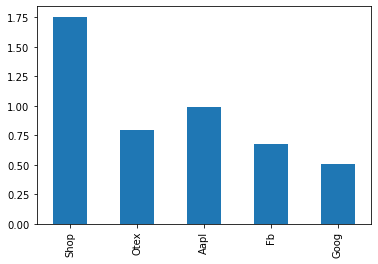

In [42]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind='bar')
plt.savefig("Output-Screenshots/bar-plot-sharpe-ratios.png")

### How does your portfolio do?

Custom Portfolio with Shop, Otex, AAPL, FB and GOOG has outperformed better than the market (S&PTSX).

Also compared with Otex, AAPL, FB and GOOG, it is inferred that Shop having the Sharpe ratio good within acceptable range considered to be good for investing.

And Shop, Algo 1, Aapl having the high values of Sharpe Ratio out of all portfolios including both the custom and the one first created with the data provided are better for investing among the portfolios selected in this assignment, while the rest of the stocks value in sub-optimal range to consider for Investment. 